# 25 gennaio 2017

## Esercizio 0

### 0.1
- a => Funz cum emp: h, Istogramma: f
- b => Funz cum emp: g, Isogramma: d
- c => Funz cum emp: i, Istogramma e

### 0.2
$$P(B|A) = \frac{P(A , B)}{P(A)} $$
la probabilità condizionata di un evento A rispetto a un evento B è la probabilità che si verifichi A, sapendo che B è verificato.

### 0.3
$$T_n = \frac{\sum_{i=1}^n {X_i}}{n} $$

### 0.4
$$ P(|T_n - \mu| < 0.5) $$

$$ P(-0.5 < T_n - \mu < 0.5) $$

$$ P(-\frac{0.5}{\frac{\sigma}{\sqrt{n}}} < \frac{T_n - \mu }{\frac{\sigma}{\sqrt{n}}}< \frac{0.5}{\frac{\sigma}{\sqrt{n}}}) $$

$$ P(-\frac{0.5}{\frac{\sigma}{\sqrt{n}}} < Z < \frac{0.5}{\frac{\sigma}{\sqrt{n}}}) $$

$$ \phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) - \phi(-\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) $$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import math

In [2]:
Z = st.norm()
n = 47
sigma = 2.5
z1 = 0.5 * math.sqrt(n)/ sigma 
z2 = - (0.5 * math.sqrt(n)/ sigma)
Z.cdf(z1) -Z.cdf(z2)

0.8296658522624347

## Esercizio 1

In [15]:
df = pd.read_csv('dati-ospedali_new.csv', sep=';')
df[:10]

,Odontoiatri_Universitari,Geologi_SSN,Collaboratori_tecnico-profes_Univ,Tecnico-sanitario_Univ,Ingegneri_Univ,Operatori_II_cat_SSN,Operatori_II_cat_Univ,Didattico-organizzativo_Univ,Vigilanza_e_ispezione_Univ,Addetti_ai_LSU_SSN,...,Sociologi_SSN,Contrattisti_SSN,Operatori_tecnici_di_assistenza_SSN,Collaboratori_Amministr_SSN,Fisici_SSN,Regione,MediciSSN,Ausiliari_specializzati_SSN,Assistenti_sociali_Univ,grandestruttura
0,NaN,NaN,0.0,0.0,0.0,29.0,0.0,0.0,0.0,NaN,...,1.0,NaN,63.0,30,NaN,Veneto,89,0.0,0,0
1,0.0,NaN,0.0,0.0,0.0,83.0,0.0,0.0,0.0,NaN,...,1.0,NaN,368.0,206,0.0,Piemonte,598,97.0,0,1
2,NaN,NaN,0.0,0.0,0.0,71.0,0.0,0.0,0.0,NaN,...,1.0,NaN,144.0,17,NaN,Friuli-Venezia Giulia,153,35.0,0,0
3,NaN,NaN,0.0,0.0,0.0,36.0,0.0,0.0,0.0,NaN,...,NaN,2.0,109.0,48,4.0,Valle d'Aosta,299,78.0,0,0
4,NaN,NaN,0.0,0.0,0.0,12.0,0.0,0.0,0.0,NaN,...,5.0,1.0,344.0,168,3.0,Toscana,604,17.0,0,1
5,NaN,NaN,0.0,0.0,0.0,47.0,0.0,0.0,0.0,NaN,...,NaN,1.0,348.0,54,NaN,Veneto,246,3.0,0,0
6,NaN,NaN,0.0,0.0,0.0,24.0,0.0,NaN,0.0,NaN,...,18.0,13.0,106.0,107,NaN,Campania,506,24.0,0,1
7,NaN,NaN,0.0,0.0,0.0,13.0,0.0,NaN,0.0,NaN,...,11.0,12.0,34.0,92,NaN,Campania,305,4.0,0,1
8,NaN,NaN,0.0,0.0,0.0,219.0,0.0,0.0,0.0,NaN,...,19.0,18.0,315.0,221,NaN,Campania,1184,87.0,0,1
9,NaN,NaN,0.0,0.0,0.0,14.0,0.0,NaN,0.0,NaN,...,1.0,3.0,NaN,113,NaN,Lombardia,207,1.0,0,0


In [4]:
# 1.1
len(df)

146

In [5]:
# 1.2
len(df.columns)

83

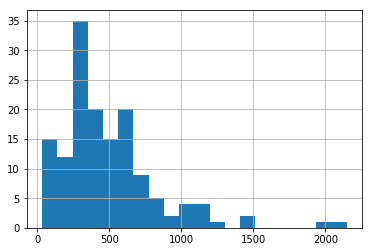

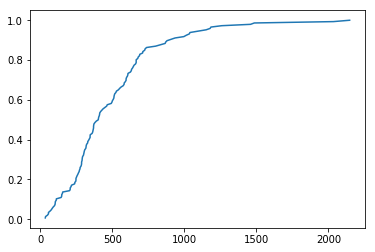

In [6]:
# 1.3
medici = df['MediciSSN'].dropna()
# 1.3.1
medici.hist(bins=20)
plt.show()

# medici.plot.box(vert=False)
# plt.show()

from statsmodels.distributions.empirical_distribution import ECDF
dist = ECDF(medici)
plt.plot(dist.x, dist.y)
plt.show()

(451.40140845070425, 383.5)

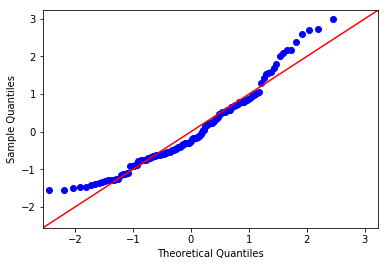

In [7]:
# 1.3.2
import statsmodels.api as sm
medici_no_outliers = df.loc[df['MediciSSN'] < 1300,'MediciSSN'].dropna()
sm.qqplot(medici_no_outliers,fit=True, line='45')
(medici_no_outliers.mean(), medici_no_outliers.median())

# dal grafico si può vedere come il parametro segua una legge normale essendo quasi sovrapposto alla bisettrice del quadrante
# (media e mediana non mi convincono troppo, ma vabbé)

In [8]:
# 1.3.3
(medici.median(), medici.quantile(0.75) - medici.quantile(0.25))

# utilizzo la mediana come indice di centralità perché più robusto rispetto agli outliers presenti nel carattere.
# di conseguenza utilizzo il range interquartile per lo stesso motivo e ben si sposa con la mediana

# (non uso la varianza perché deriva dalla media che soffre gli outliers)

(402.5, 357.25)

In [9]:
# 1.4
farmacisti = df['Farmacisti_SSN']

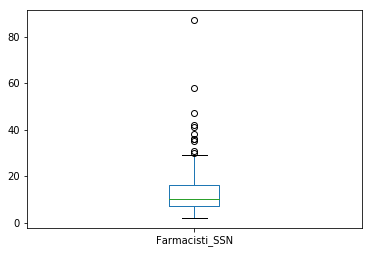

In [10]:
# 1.4.1
farmacisti.plot.box()
plt.show()

In [11]:
# 1.4.2 / 1.4.3
# Coefficiente di variazione (o deviazione standard relativa)
medici_mean = 406.6
medici_dev = 160.7
medici_coeff_var = medici_dev / medici_mean

farmacisti_mean = 6.4
farmacisti_dev = 2.9
farmacisti_coeff_var = farmacisti_dev / farmacisti_mean

(medici_coeff_var, farmacisti_coeff_var)

(0.39522872602065906, 0.45312499999999994)

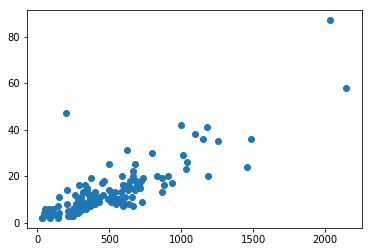

0.8191729725239217

In [12]:
# 1.4.4
plt.scatter(medici, farmacisti)
plt.show()

medici.corr(farmacisti)
# il grafico mostra una dipendenza lineare tra i due caratteri
# il valore di correlazione molto vicino a 1 conferma la relazione

\# 1.5

0 farmacisti => 2 \
1 farmacisti => 22 \
2 farmacisti => 4 \
3 farmacisti => 1 

0 grande struttura => 24 \
1 grande struttra => 5

(L'esercizio richiedeva di basarsi sulla tabella sulla fotocopia. Nel caso richiedesse di farlo tramite codice bisogna fare così)
pd.crosstab(index=df.Avvocati_SSN, columns= df.grandestruttura, margins=True)

## Esercizio 2
veri positivi : 15 \
veri negativi : 12 \
falsi positivi : 35 \
falsi negativi : 2

## Esercizio 3


In [13]:
# 3.1
ingegneri = df['Ingegneri_SSN']
(ingegneri.mean(), ingegneri.std())

(4.708333333333333, 4.306240389679412)

#### 3.2
$$ P(| \bar{X_n} - u| < 0.5) >= 0.85 $$

$$ P(-0.5 < \bar{X_n} - u < 0.5) >= 0.85 $$

$$ P(-\frac{0.5}{\frac{\sigma}{\sqrt{n}}}<\frac{\bar{X_n}-u}{\frac{\sigma}{\sqrt{n}}}<\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) >=0.85 $$

$$ P(-\frac{0.5}{\frac{\sigma}{\sqrt{n}}}<Z<\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) >=0.85 $$

$$ P(Z < \frac{0.5}{\frac{\sigma}{\sqrt{n}}}) - P(Z < - \frac{0.5}{\frac{\sigma}{\sqrt{n}}}) >=0.85 $$

$$ \phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) - \phi(- \frac{0.5}{\frac{\sigma}{\sqrt{n}}}) >=0.85 $$

$$ \phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}}) - (1 - \phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}})) >=0.85 $$

$$ 2\phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}})>=1.85 $$

$$ \phi(\frac{0.5}{\frac{\sigma}{\sqrt{n}}})>=0.925 $$

$$ \frac{0.5}{\frac{\sigma}{\sqrt{n}}}>=\phi^{-1}(0.925) $$

$$ n>=(\frac{\sigma}{0.5}\phi^{-1}(0.925))^2 $$

In [14]:
sigma = ingegneri.std()
X = st.norm()
((sigma/0.5)*X.ppf(0.925))**2

153.70884494899622

Per avere una stima del valore atteso con un errore inferiore a 1 è necessario un campione di almeno 154 elementi.
Il nostro dataset ne contiene solo 146